In [1]:
import torch
import torch.nn as nn
import torchviz

num_classes = 2
img_height = 256
img_width = 256

# Define CNN model
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * (img_height // 8) * (img_width // 8), 128)
        # self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc2 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x

# Create model and dummy input
model = CNN(num_classes)
dummy_input = torch.randn(1, 1, 256, 256)  # Batch size 1, 1 channel, 32x32 input

# Generate visualization
output = model(dummy_input)
torchviz.make_dot(output, params=dict(model.named_parameters())).render("cnn_model", format="png", view=True)


'cnn_model.png'

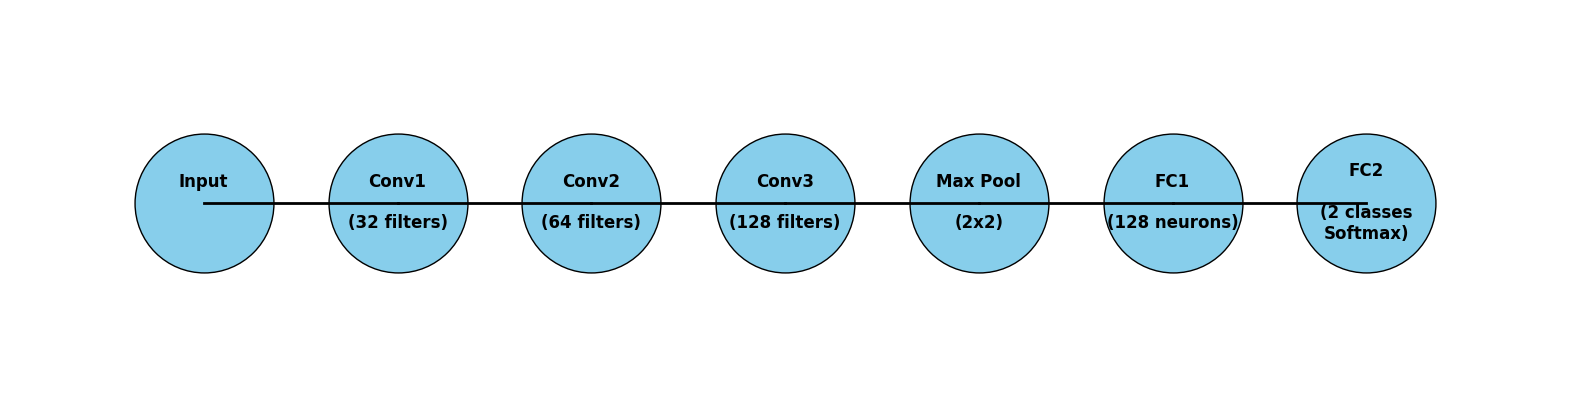

In [8]:
import matplotlib.pyplot as plt

def draw_cnn():
    fig, ax = plt.subplots(figsize=(20, 5))

    # Define the layers and their positions
    layers = {
        "Input\n\n": (1, 4),
        "Conv1\n\n(32 filters)": (2, 4),
        "Conv2\n\n(64 filters)": (3, 4),
        "Conv3\n\n(128 filters)": (4, 4),
        "Max Pool\n\n(2x2)": (5, 4),
        "FC1\n\n(128 neurons)": (6, 4),
        "FC2\n\n(2 classes\nSoftmax)": (7, 4)
    }

    # Draw nodes
    for name, (x, y) in layers.items():
        ax.scatter(x, y, s=10000, c='skyblue', edgecolors='k', zorder=2)
        ax.text(x, y, name, ha='center', va='center', fontsize=12, fontweight='bold')

    # Draw connections
    for i in range(len(layers) - 1):
        ax.plot([i + 1, i + 2], [4, 4], 'k-', lw=2)

    # Formatting
    ax.set_xlim(0, 8)
    ax.set_ylim(3, 5)
    ax.axis('off')
    plt.show()

draw_cnn()
